In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings('ignore')

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [9]:
# !pip install pmdarima
from pmdarima.arima import auto_arima

In [19]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.48 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.09 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.24 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.05 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [22]:
print(stepwise_model.aic())

# stepwise=True --> AIC: 1012.9907965327785
# stepwise=False --> AIC: 1019.1780567487502

1019.1780567487502


In [23]:
train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [27]:
train.tail(2)

,#Passengers
Month,
1959-11-01,362
1959-12-01,405


In [28]:
test.head(2)

,#Passengers
Month,
1960-01-01,417
1960-02-01,391


In [29]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [42]:
future_forecast = stepwise_model.predict(n_periods=12)

In [43]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#Passengers Predict'])

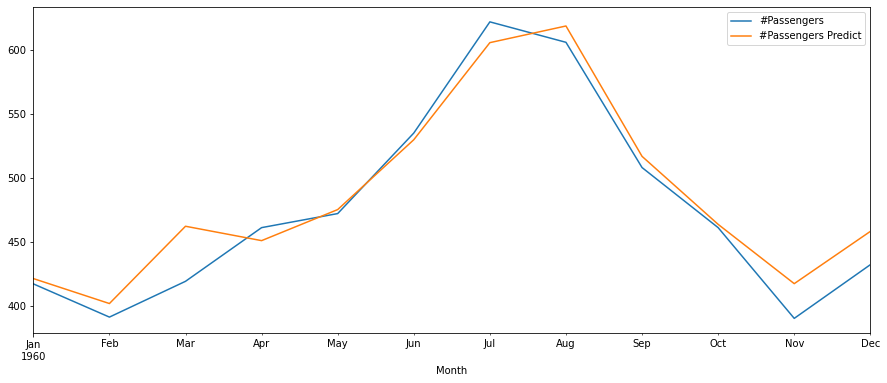

In [44]:
pd.concat([test, future_forecast], axis=1).plot();

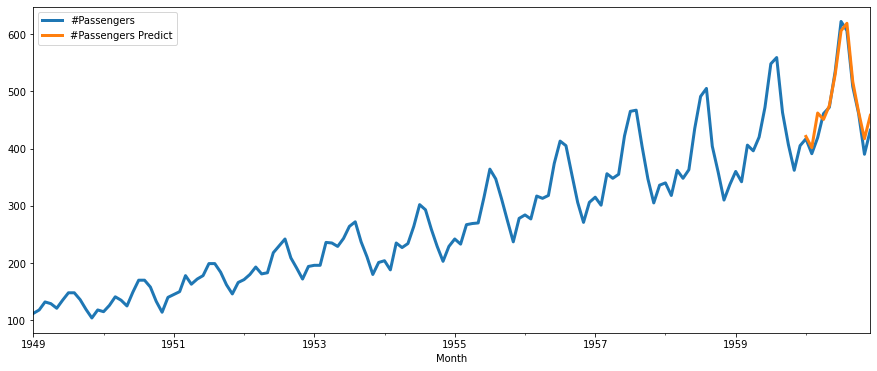

In [45]:
pd.concat([data, future_forecast], axis=1).plot(linewidth=3);